#           Language Identification
##                                             >    MultiLingual Text Classification using Machine Learning Algorithms 
## PHASES 1: TRAINING
### Step 1: Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Step 2: Import preprocessed dataset

In [2]:
import pandas as pd
dataset=pd.read_csv("./lang_data_clipped3.csv")

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np
import seaborn as sns

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

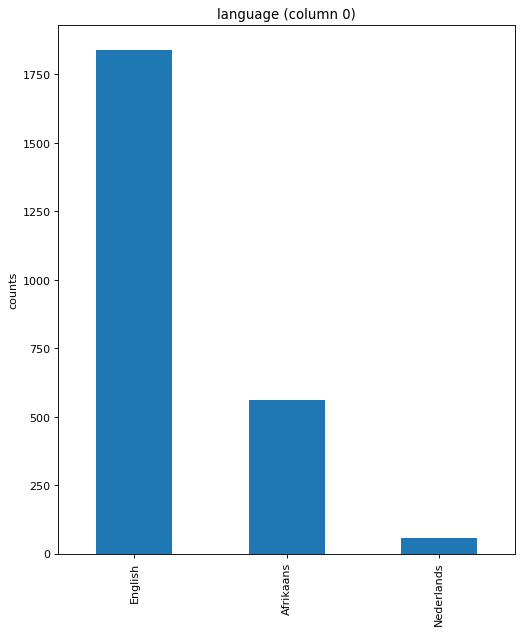

In [4]:
plotPerColumnDistribution(dataset, 10, 5)

### Step 4: Seperate features and target

In [5]:
#split the data into train and test set
from sklearn.model_selection         import train_test_split
text = dataset.Text
language = dataset.language
train_features, test_features, train_labels, test_labels = train_test_split(text, language, test_size=0.33, random_state=42)

In [6]:
print('lenght of training data = ',len(train_features))
print('lenght of test data = ', len(test_features))

lenght of training data =  1648
lenght of test data =  812


In [7]:
train_labels

380     English
226     English
1313    English
1898    English
715     English
         ...   
1638    English
1095    English
1130    English
1294    English
860     English
Name: language, Length: 1648, dtype: object

In [8]:
# create binary labels
df = pd.DataFrame()
df['b_labels'] = train_labels.map({'English': 0, 'Afrikaans': 1, 'Nederlands': 2})

In [9]:
train_labels = pd.concat([train_labels, df],axis=1, join='inner')

In [10]:
train_df = pd.concat([train_labels, train_features], axis=1, join='inner')
train_df['b_labels'].value_counts()

0    1237
1     374
2      37
Name: b_labels, dtype: int64

In [11]:
train_df

,language,b_labels,Text
380,English,0,bean counter
226,English,0,the land of nod
1313,English,0,glass ceiling
1898,English,0,a womans place is in the home
715,English,0,walter scott phrases coined by
...,...,...,...
1638,English,0,chinless wonder
1095,English,0,alike as two peas in a pod
1130,English,0,pond life
1294,English,0,a fly in the ointment


In [12]:
class0 = train_df[train_df['b_labels'] == 0]
class1 = train_df[train_df['b_labels'] == 1]
class2 = train_df[train_df['b_labels'] == 2]
max = train_df['b_labels'].value_counts().max()

if len(train_df[train_df['b_labels'] == 0]) == max:
  majority = class0
  minority1 = class1
  minority2 = class2
elif len(train_df[train_df['b_labels'] == 1]) == max:
  minority1 = class0
  majority = class1
  minority2 = class2
else:
  minority1 = class0
  minority2 = class1
  majority = class2

In [13]:
from sklearn.utils import shuffle, resample

new_minority1 = resample(minority1, 
                   replace=True,     # sample with replacement
                   n_samples=majority.shape[0],    # to match majority class
                   random_state=42)

new_minority2 = resample(minority2, 
                   replace=True,     # sample with replacement
                   n_samples=majority.shape[0],    # to match majority class
                   random_state=42)

train_df = pd.concat([majority, new_minority1])
train_df = pd.concat([train_df, new_minority2])
train_df = shuffle(train_df, random_state=42)

train_df['b_labels'].value_counts()

1    1237
2    1237
0    1237
Name: b_labels, dtype: int64

In [14]:
train_labels = train_df['language']
train_features = train_df['Text']

In [15]:
len(train_labels)

3711

In [16]:
train_labels.head()

2205     Afrikaans
2392       English
1659    Nederlands
1445    Nederlands
1162       English
Name: language, dtype: object

In [17]:
train_features.isnull()

2205    False
2392    False
1659    False
1445    False
1162    False
        ...  
1282    False
2302    False
732     False
1445    False
1516    False
Name: Text, Length: 3711, dtype: bool

### Feature Extraction
The features were extracted using 
> sklearn CountVectorizer

In [18]:
from sklearn.feature_extraction.text import*
from sklearn                         import preprocessing
from sklearn.preprocessing           import LabelEncoder

In [19]:
#uni gram
uni_vector =   CountVectorizer( strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(1,1), max_features=1000)
bag_of_words_uni = uni_vector.fit_transform(train_features)
bag_of_words_uni.shape

(3711, 1000)

In [20]:
#bigram
bi_vector =   CountVectorizer( strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(2,2), max_features=1000)
bag_of_words_bi = bi_vector.fit_transform(train_features)

In [21]:
#trigram
tri_vector =   CountVectorizer( strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(3,3), max_features=1000)
bag_of_words_tri = tri_vector.fit_transform(train_features)

In [22]:
#3chargram
char3_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(3,3), max_features=1000)
bag_of_words_char3 = char3_vector.fit_transform(train_features)

In [23]:
#4chargram
char4_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(4,4), max_features=1000)
bag_of_words_char4 = char4_vector.fit_transform(train_features)

In [24]:
#5chargram
char5_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(5,5), max_features=1000)
bag_of_words_char5 = char5_vector.fit_transform(train_features)

In [25]:
#6chargram
char6_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(6,6), max_features=1000)
bag_of_words_char6 = char6_vector.fit_transform(train_features)

In [26]:
#7chargram
char7_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(7,7), max_features=1000)
bag_of_words_char7 = char7_vector.fit_transform(train_features)

In [27]:
#8chargram
char8_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(1,1), max_features=1000)
bag_of_words_char8 = char8_vector.fit_transform(train_features)

In [28]:
#9chargram
char9_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(9,9), max_features=1000)
bag_of_words_char9 = char9_vector.fit_transform(train_features)

In [29]:
#10chargram
char10_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(10,10), max_features=1000)
bag_of_words_char10 = char10_vector.fit_transform(train_features)

In [30]:
# Get feature names
uni_feature_names = uni_vector.get_feature_names()
bi_feature_names = bi_vector.get_feature_names()
tri_feature_names = tri_vector.get_feature_names()
char3_feature_names = char3_vector.get_feature_names()
char4_feature_names = char4_vector.get_feature_names()
char5_feature_names = char5_vector.get_feature_names()
char6_feature_names = char6_vector.get_feature_names()
char7_feature_names = char7_vector.get_feature_names()
char8_feature_names = char8_vector.get_feature_names()
char9_feature_names = char9_vector.get_feature_names()
char10_feature_names = char10_vector.get_feature_names()

In [31]:
uni_train_features=pd.DataFrame(bag_of_words_uni.toarray(), columns=uni_feature_names)
uni_train_features[:5]

,a,aan,aangesigte,aankom,aap,aarde,about,absorbeer,adres,afhaal,...,zaken,zal,zeggen,zegt,zelden,zijn,zingt,zo,zoals,zonk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
bi_train_features=pd.DataFrame(bag_of_words_bi.toarray(), columns=bi_feature_names)
tri_train_features=pd.DataFrame(bag_of_words_tri.toarray(), columns=tri_feature_names)
char3_train_features=pd.DataFrame(bag_of_words_char3.toarray(), columns=char3_feature_names)
char4_train_features=pd.DataFrame(bag_of_words_char4.toarray(), columns=char4_feature_names)
char5_train_features=pd.DataFrame(bag_of_words_char5.toarray(), columns=char5_feature_names)
char6_train_features=pd.DataFrame(bag_of_words_char6.toarray(), columns=char6_feature_names)
char7_train_features=pd.DataFrame(bag_of_words_char7.toarray(), columns=char7_feature_names)
char8_train_features=pd.DataFrame(bag_of_words_char8.toarray(), columns=char8_feature_names)
char9_train_features=pd.DataFrame(bag_of_words_char9.toarray(), columns=char9_feature_names)
char10_train_features=pd.DataFrame(bag_of_words_char10.toarray(), columns=char10_feature_names)

## Step 5: Train Machine Learning Algorithms using Train Data
### Apply RandomForestClassifier on train dataset

In [33]:
from sklearn.ensemble                import RandomForestClassifier

#apply RandomForestClassifier on train dataset
rfc_uni = RandomForestClassifier()                      
rfc_uni.fit(uni_train_features, train_labels);

rfc_bi = RandomForestClassifier()                      
rfc_bi.fit(bi_train_features, train_labels);

rfc_tri = RandomForestClassifier()                      
rfc_tri.fit(tri_train_features, train_labels);

rfc_char3 = RandomForestClassifier()                      
rfc_char3.fit(char3_train_features, train_labels);

rfc_char4 = RandomForestClassifier()                      
rfc_char4.fit(char4_train_features, train_labels);

rfc_char5 = RandomForestClassifier()                      
rfc_char5.fit(char5_train_features, train_labels);

rfc_char6 = RandomForestClassifier()                      
rfc_char6.fit(char6_train_features, train_labels);

rfc_char7 = RandomForestClassifier()                      
rfc_char7.fit(char7_train_features, train_labels);

rfc_char8 = RandomForestClassifier()                      
rfc_char8.fit(char8_train_features, train_labels);

rfc_char9 = RandomForestClassifier()                      
rfc_char9.fit(char9_train_features, train_labels);

rfc_char10 = RandomForestClassifier()                      
rfc_char10.fit(char10_train_features, train_labels);

### Apply LinearSVC() on train dataset

In [34]:
from sklearn.svm                     import LinearSVC
#apply LinearSVC() on train dataset
lsvc_uni = LinearSVC()                      
lsvc_uni.fit(uni_train_features, train_labels);

lsvc_bi = LinearSVC()                      
lsvc_bi.fit(bi_train_features, train_labels);

lsvc_tri = LinearSVC()                      
lsvc_tri.fit(tri_train_features, train_labels);

lsvc_char3 = LinearSVC()                     
lsvc_char3.fit(char3_train_features, train_labels);

lsvc_char4 = LinearSVC()                     
lsvc_char4.fit(char4_train_features, train_labels);

lsvc_char5 = LinearSVC()                     
lsvc_char5.fit(char5_train_features, train_labels);

lsvc_char6 = LinearSVC()                     
lsvc_char6.fit(char6_train_features, train_labels);

lsvc_char7 = LinearSVC()                     
lsvc_char7.fit(char7_train_features, train_labels);

lsvc_char8 = LinearSVC()                     
lsvc_char8.fit(char8_train_features, train_labels);

lsvc_char9 = LinearSVC()                     
lsvc_char9.fit(char9_train_features, train_labels);

lsvc_char10 = LinearSVC()                     
lsvc_char10.fit(char10_train_features, train_labels);

### Apply LogisticRegression() on train dataset

In [35]:
from sklearn.linear_model            import LogisticRegression
#apply LogisticRegression() on train dataset
lr_uni = LogisticRegression()                      
lr_uni.fit(uni_train_features, train_labels);

lr_bi = LogisticRegression()                      
lr_bi.fit(bi_train_features, train_labels);

lr_tri = LogisticRegression()                      
lr_tri.fit(tri_train_features, train_labels);

lr_char3 = LogisticRegression()                     
lr_char3.fit(char3_train_features, train_labels);

lr_char4 = LogisticRegression()                     
lr_char4.fit(char4_train_features, train_labels);

lr_char5 = LogisticRegression()                     
lr_char5.fit(char5_train_features, train_labels);

lr_char6 = LogisticRegression()                     
lr_char6.fit(char6_train_features, train_labels);

lr_char7 = LogisticRegression()                     
lr_char7.fit(char7_train_features, train_labels);

lr_char8 = LogisticRegression()                     
lr_char8.fit(char8_train_features, train_labels);

lr_char9 = LogisticRegression()                     
lr_char9.fit(char9_train_features, train_labels);

lr_char10 = LogisticRegression()                     
lr_char10.fit(char10_train_features, train_labels);

In [36]:
from sklearn.naive_bayes import MultinomialNB
#apply MultinomialNB() on train dataset
nb_uni = MultinomialNB()                      
nb_uni.fit(uni_train_features, train_labels);

nb_bi = MultinomialNB()                      
nb_bi.fit(bi_train_features, train_labels);

nb_tri = MultinomialNB()                      
nb_tri.fit(tri_train_features, train_labels);

nb_char3 = MultinomialNB()                     
nb_char3.fit(char3_train_features, train_labels);

nb_char4 = MultinomialNB()                     
nb_char4.fit(char4_train_features, train_labels);

nb_char5 = MultinomialNB()                     
nb_char5.fit(char5_train_features, train_labels);

nb_char6 = MultinomialNB()                     
nb_char6.fit(char6_train_features, train_labels);

nb_char7 = MultinomialNB()                     
nb_char7.fit(char7_train_features, train_labels);

nb_char8 = MultinomialNB()                     
nb_char8.fit(char8_train_features, train_labels);

nb_char9 = MultinomialNB()                     
nb_char9.fit(char9_train_features, train_labels);

nb_char10 = MultinomialNB()                     
nb_char10.fit(char10_train_features, train_labels);

## Phase 2 Testing

In [37]:
uni_test_features = uni_vector.transform(test_features)
uni_test_features=pd.DataFrame(uni_test_features.toarray(), columns=uni_feature_names)
uni_test_features[:5]

,a,aan,aangesigte,aankom,aap,aarde,about,absorbeer,adres,afhaal,...,zaken,zal,zeggen,zegt,zelden,zijn,zingt,zo,zoals,zonk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
bi_test_features = bi_vector.transform(test_features)
bi_test_features=pd.DataFrame(bi_test_features.toarray(), columns=bi_feature_names)

In [39]:
tri_test_features = tri_vector.transform(test_features)
tri_test_features=pd.DataFrame(tri_test_features.toarray(), columns=tri_feature_names)

In [40]:
char3_test_features = char3_vector.transform(test_features)
char3_test_features=pd.DataFrame(char3_test_features.toarray(), columns=char3_feature_names)

In [41]:
char4_test_features = char4_vector.transform(test_features)
char4_test_features=pd.DataFrame(char4_test_features.toarray(), columns=char4_feature_names)

In [42]:
char5_test_features = char5_vector.transform(test_features)
char5_test_features=pd.DataFrame(char5_test_features.toarray(), columns=char5_feature_names)

In [43]:
char6_test_features = char6_vector.transform(test_features)
char6_test_features=pd.DataFrame(char6_test_features.toarray(), columns=char6_feature_names)

In [44]:
char7_test_features = char7_vector.transform(test_features)
char7_test_features=pd.DataFrame(char7_test_features.toarray(), columns=char7_feature_names)

In [45]:
char8_test_features = char8_vector.transform(test_features)
char8_test_features=pd.DataFrame(char8_test_features.toarray(), columns=char8_feature_names)

In [46]:
char9_test_features = char9_vector.transform(test_features)
char9_test_features=pd.DataFrame(char9_test_features.toarray(), columns=char9_feature_names)

In [47]:
char10_test_features = char10_vector.transform(test_features)
char10_test_features=pd.DataFrame(char10_test_features.toarray(), columns=char10_feature_names)

### Step 6: Evaluate Machine Learning Algorithms using Test Data

In [48]:
from sklearn.metrics                 import accuracy_score

#### Random forest Classififier

In [49]:
predictions_uni_rfc = rfc_uni.predict(uni_test_features)         #prediction
uni_rfc = accuracy_score(test_labels, predictions_uni_rfc)           #accuracy

predictions_bi_rfc = rfc_bi.predict(bi_test_features)         #prediction
bi_rfc = accuracy_score(test_labels, predictions_bi_rfc)           #accuracy

predictions_tri_rfc = rfc_tri.predict(tri_test_features)         #prediction
tri_rfc = accuracy_score(test_labels, predictions_tri_rfc)           #accuracy

predictions_char3_rfc = rfc_char3.predict(char3_test_features)         #prediction
char3_rfc = accuracy_score(test_labels, predictions_char3_rfc)           #accuracy

predictions_char4_rfc = rfc_char4.predict(char4_test_features)         #prediction
char4_rfc = accuracy_score(test_labels, predictions_char4_rfc)           #accuracy

predictions_char5_rfc = rfc_char5.predict(char5_test_features)         #prediction
char5_rfc = accuracy_score(test_labels, predictions_char5_rfc)           #accuracy

predictions_char6_rfc = rfc_char6.predict(char6_test_features)         #prediction
char6_rfc = accuracy_score(test_labels, predictions_char6_rfc)           #accuracy

predictions_char7_rfc = rfc_char7.predict(char7_test_features)         #prediction
char7_rfc = accuracy_score(test_labels, predictions_char7_rfc)           #accuracy

predictions_char8_rfc = rfc_char8.predict(char8_test_features)         #prediction
char8_rfc = accuracy_score(test_labels, predictions_char8_rfc)           #accuracy

predictions_char9_rfc = rfc_char9.predict(char9_test_features)         #prediction
char9_rfc = accuracy_score(test_labels, predictions_char9_rfc)           #accuracy

predictions_char10_rfc = rfc_char10.predict(char10_test_features)         #prediction
char10_rfc = accuracy_score(test_labels, predictions_char10_rfc)           #accuracy

#### LinearSVC

In [50]:
predictions_uni_lsvc= lsvc_uni.predict(uni_test_features)         #prediction
uni_lsvc = accuracy_score(test_labels, predictions_uni_lsvc)           #accuracy

predictions_bi_lsvc = lsvc_bi.predict(bi_test_features)         #prediction
bi_lsvc = accuracy_score(test_labels, predictions_bi_lsvc)           #accuracy

predictions_tri_lsvc = lsvc_tri.predict(tri_test_features)         #prediction
tri_lsvc = accuracy_score(test_labels, predictions_tri_lsvc)           #accuracy

predictions_char3_lsvc = lsvc_char3.predict(char3_test_features)         #prediction
char3_lsvc = accuracy_score(test_labels, predictions_char3_lsvc)           #accuracy

predictions_char4_lsvc = lsvc_char4.predict(char4_test_features)         #prediction
char4_lsvc = accuracy_score(test_labels, predictions_char4_lsvc)           #accuracy

predictions_char5_lsvc = lsvc_char5.predict(char5_test_features)         #prediction
char5_lsvc = accuracy_score(test_labels, predictions_char5_lsvc)           #accuracy

predictions_char6_lsvc = lsvc_char6.predict(char6_test_features)         #prediction
char6_lsvc = accuracy_score(test_labels, predictions_char6_lsvc)           #accuracy

predictions_char7_lsvc = lsvc_char7.predict(char7_test_features)         #prediction
char7_lsvc = accuracy_score(test_labels, predictions_char7_lsvc)           #accuracy

predictions_char8_lsvc = lsvc_char8.predict(char8_test_features)         #prediction
char8_lsvc = accuracy_score(test_labels, predictions_char8_lsvc)           #accuracy

predictions_char9_lsvc = lsvc_char9.predict(char9_test_features)         #prediction
char9_lsvc = accuracy_score(test_labels, predictions_char9_lsvc)           #accuracy

predictions_char10_lsvc = lsvc_char10.predict(char10_test_features)         #prediction
char10_lsvc = accuracy_score(test_labels, predictions_char10_lsvc)           #accuracy

#### Logistic Regression

In [51]:
predictions_uni_lr = lr_uni.predict(uni_test_features)         #prediction
uni_lr = accuracy_score(test_labels, predictions_uni_lr)           #accuracy

predictions_bi_lr = lr_bi.predict(bi_test_features)         #prediction
bi_lr = accuracy_score(test_labels, predictions_bi_lr)           #accuracy

predictions_tri_lr = lr_tri.predict(tri_test_features)         #prediction
tri_lr = accuracy_score(test_labels, predictions_tri_lr)           #accuracy

predictions_char3_lr = lr_char3.predict(char3_test_features)         #prediction
char3_lr = accuracy_score(test_labels, predictions_char3_lr)           #accuracy

predictions_char4_lr = lr_char4.predict(char4_test_features)         #prediction
char4_lr = accuracy_score(test_labels, predictions_char4_lr)           #accuracy

predictions_char5_lr = lr_char5.predict(char5_test_features)         #prediction
char5_lr = accuracy_score(test_labels, predictions_char5_lr)           #accuracy

predictions_char6_lr = lr_char6.predict(char6_test_features)         #prediction
char6_lr = accuracy_score(test_labels, predictions_char6_lr)           #accuracy

predictions_char7_lr = lr_char7.predict(char7_test_features)         #prediction
char7_lr = accuracy_score(test_labels, predictions_char7_lr)           #accuracy

predictions_char8_lr = lr_char8.predict(char8_test_features)         #prediction
char8_lr = accuracy_score(test_labels, predictions_char8_lr)           #accuracy

predictions_char9_lr = lr_char9.predict(char9_test_features)         #prediction
char9_lr = accuracy_score(test_labels, predictions_char9_lr)           #accuracy

predictions_char10_lr = lr_char10.predict(char10_test_features)         #prediction
char10_lr = accuracy_score(test_labels, predictions_char10_lr)           #accuracy

In [52]:
predictions_uni_nb = nb_uni.predict(uni_test_features)         #prediction
uni_nb = accuracy_score(test_labels, predictions_uni_nb)           #accuracy

predictions_bi_nb = nb_bi.predict(bi_test_features)         #prediction
bi_nb = accuracy_score(test_labels, predictions_bi_nb)           #accuracy

predictions_tri_nb = nb_tri.predict(tri_test_features)         #prediction
tri_nb = accuracy_score(test_labels, predictions_tri_nb)           #accuracy

predictions_char3_nb = nb_char3.predict(char3_test_features)         #prediction
char3_nb = accuracy_score(test_labels, predictions_char3_nb)           #accuracy

predictions_char4_nb = nb_char4.predict(char4_test_features)         #prediction
char4_nb = accuracy_score(test_labels, predictions_char4_nb)           #accuracy

predictions_char5_nb = nb_char5.predict(char5_test_features)         #prediction
char5_nb = accuracy_score(test_labels, predictions_char5_nb)           #accuracy

predictions_char6_nb = nb_char6.predict(char6_test_features)         #prediction
char6_nb = accuracy_score(test_labels, predictions_char6_nb)           #accuracy

predictions_char7_nb = nb_char7.predict(char7_test_features)         #prediction
char7_nb = accuracy_score(test_labels, predictions_char7_nb)           #accuracy

predictions_char8_nb = nb_char8.predict(char8_test_features)         #prediction
char8_nb = accuracy_score(test_labels, predictions_char8_nb)           #accuracy

predictions_char9_nb = nb_char9.predict(char9_test_features)         #prediction
char9_nb = accuracy_score(test_labels, predictions_char9_nb)           #accuracy

predictions_char10_nb = lr_char10.predict(char10_test_features)         #prediction
char10_nb = accuracy_score(test_labels, predictions_char10_nb)           #accuracy

### Step 7: Selection of Best Model


In [53]:
#!pip install prettytable

In [54]:
from prettytable                     import PrettyTable
from astropy.table                   import Table, Column
Model_Table = PrettyTable()
Model_Table.field_names = [" ", "   Random forest Classififier  ", "     Linear SVC       ","   Logistic Regression   "]
Model_Table.add_row(["  Uni Gram  ", round(uni_rfc,2),round(uni_lsvc,2),round(uni_lr,2)])
Model_Table.add_row(["  Bi Gram  ", round(bi_rfc,2),round(bi_lsvc,2),round(bi_lr,2)])
Model_Table.add_row(["  Tri Gram  ", round(tri_rfc,2),round(tri_lsvc,2),round(tri_lr,2)])
Model_Table.add_row(["  3 Char Gram  ", round(char3_rfc,2),round(char3_lsvc,2),round(char3_lr,2)])
Model_Table.add_row(["  4 Char Gram  ", round(char4_rfc,2),round(char4_lsvc,2),round(char4_lr,2)])
Model_Table.add_row(["  5 Char Gram  ", round(char5_rfc,2),round(char5_lsvc,2),round(char5_lr,2)])
Model_Table.add_row(["  6 Char Gram  ", round(char6_rfc,2),round(char6_lsvc,2),round(char6_lr,2)])
Model_Table.add_row(["  7 Char Gram  ", round(char7_rfc,2),round(char7_lsvc,2),round(char7_lr,2)])
Model_Table.add_row(["  8 Char Gram  ", round(char8_rfc,2),round(char8_lsvc,2),round(char8_lr,2)])
Model_Table.add_row(["  9 Char Gram  ", round(char9_rfc,2),round(char9_lsvc,2),round(char9_lr,2)])
Model_Table.add_row(["  10 Char Gram  ", round(char10_rfc,2),round(char10_lsvc,2),round(char10_lr,2)])
print("Detailed performance of all models:")
print(Model_Table)

Detailed performance of all models:
+------------------+---------------------------------+------------------------+---------------------------+
|                  |    Random forest Classififier   |      Linear SVC        |    Logistic Regression    |
+------------------+---------------------------------+------------------------+---------------------------+
|     Uni Gram     |               0.97              |          0.96          |            0.97           |
|     Bi Gram      |               0.88              |          0.87          |            0.87           |
|     Tri Gram     |               0.75              |          0.75          |            0.76           |
|   3 Char Gram    |               0.96              |          0.97          |            0.97           |
|   4 Char Gram    |               0.95              |          0.95          |            0.95           |
|   5 Char Gram    |               0.94              |          0.94          |            0.93     

In [55]:
Best_Model = PrettyTable()
Best_Model.field_names = [" ", "   Random forest Classififier  ", "     Linear SVC          ","   Logistic Regression   "]
Best_Model.add_row(["  Uni Gram  ", round(uni_rfc,2),round(uni_lsvc,2),round(uni_lr,2)])
Best_Model.add_row(["  3 Char Gram  ", round(char3_rfc,2),round(char3_lsvc,2),round(char3_lr,2)])
Best_Model.add_row(["  8 Char Gram  ", round(char8_rfc,2),round(char8_lsvc,2),round(char8_lr,2)])
print("Best Model")
print(Best_Model)

Best Model
+-----------------+---------------------------------+---------------------------+---------------------------+
|                 |    Random forest Classififier   |      Linear SVC           |    Logistic Regression    |
+-----------------+---------------------------------+---------------------------+---------------------------+
|     Uni Gram    |               0.97              |            0.96           |            0.97           |
|   3 Char Gram   |               0.96              |            0.97           |            0.97           |
|   8 Char Gram   |               0.91              |            0.87           |            0.87           |
+-----------------+---------------------------------+---------------------------+---------------------------+


Confusion matrix, without normalization
[[177  11   0]
 [  2 600   0]
 [  2  13   7]]
Normalized confusion matrix
[[0.94148936 0.05851064 0.        ]
 [0.00332226 0.99667774 0.        ]
 [0.09090909 0.59090909 0.31818182]]


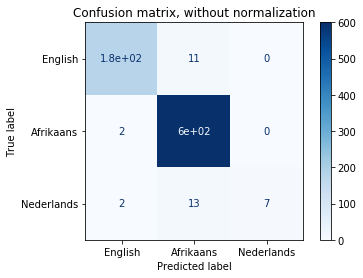

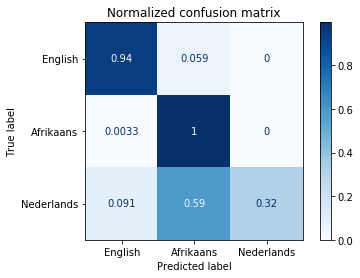

In [56]:
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ['English', 'Afrikaans', 'Nederlands']
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rfc_uni, uni_test_features, test_labels,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.grid(False)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    
plt.grid(False)
plt.show()

Confusion matrix, without normalization
[[176  12   0]
 [  4 598   0]
 [  2  13   7]]
Normalized confusion matrix
[[0.93617021 0.06382979 0.        ]
 [0.00664452 0.99335548 0.        ]
 [0.09090909 0.59090909 0.31818182]]


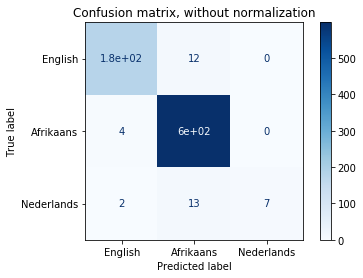

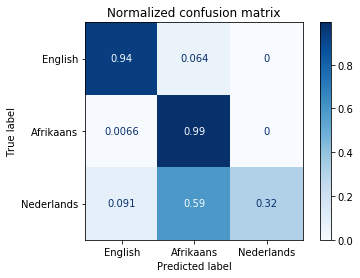

In [57]:
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ['English', 'Afrikaans', 'Nederlands']
for title, normalize in titles_options:
    disp = plot_confusion_matrix(lsvc_uni, uni_test_features, test_labels,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.grid(False)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    
plt.grid(False)
plt.show()

Confusion matrix, without normalization
[[173  14   1]
 [  1 601   0]
 [  1   9  12]]
Normalized confusion matrix
[[0.92021277 0.07446809 0.00531915]
 [0.00166113 0.99833887 0.        ]
 [0.04545455 0.40909091 0.54545455]]


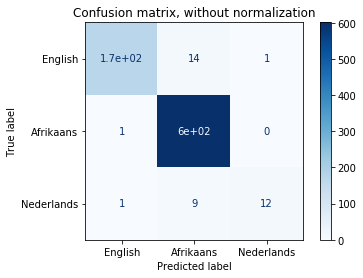

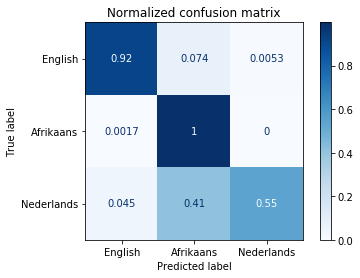

In [58]:
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ['English', 'Afrikaans', 'Nederlands']
for title, normalize in titles_options:
    disp = plot_confusion_matrix(lr_uni, uni_test_features, test_labels,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.grid(False)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    
plt.grid(False)
plt.show()

Confusion matrix, without normalization
[[177  11   0]
 [  4 598   0]
 [  4  12   6]]
Normalized confusion matrix
[[0.94148936 0.05851064 0.        ]
 [0.00664452 0.99335548 0.        ]
 [0.18181818 0.54545455 0.27272727]]


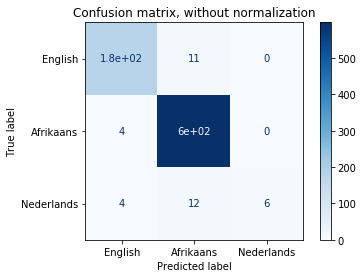

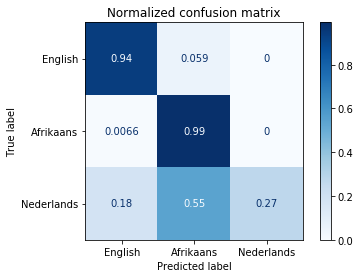

In [59]:
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ['English', 'Afrikaans', 'Nederlands']
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rfc_char3, char3_test_features, test_labels,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.grid(False)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    
plt.grid(False)
plt.show()

Confusion matrix, without normalization
[[179   7   2]
 [  0 602   0]
 [  8   5   9]]
Normalized confusion matrix
[[0.95212766 0.03723404 0.0106383 ]
 [0.         1.         0.        ]
 [0.36363636 0.22727273 0.40909091]]


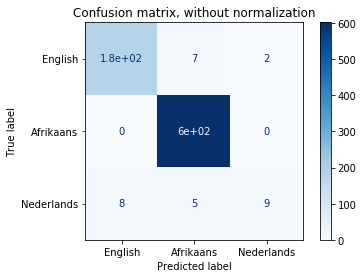

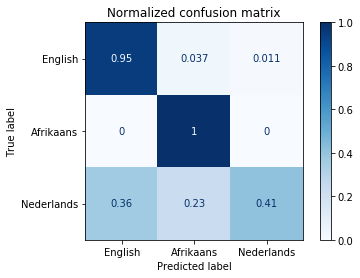

In [60]:
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ['English', 'Afrikaans', 'Nederlands']
for title, normalize in titles_options:
    disp = plot_confusion_matrix(lsvc_char3, char3_test_features, test_labels,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.grid(False)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    
plt.grid(False)
plt.show()

Confusion matrix, without normalization
[[178   6   4]
 [  1 601   0]
 [  6   5  11]]
Normalized confusion matrix
[[0.94680851 0.03191489 0.0212766 ]
 [0.00166113 0.99833887 0.        ]
 [0.27272727 0.22727273 0.5       ]]


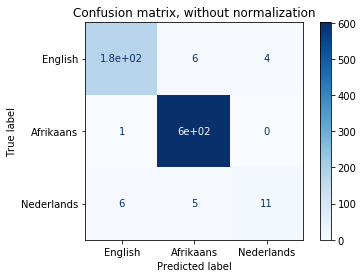

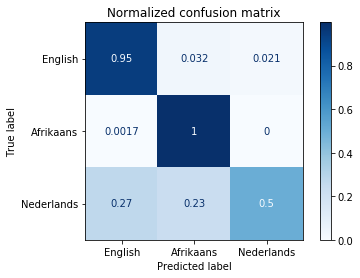

In [61]:
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ['English', 'Afrikaans', 'Nederlands']
for title, normalize in titles_options:
    disp = plot_confusion_matrix(lr_char3, char3_test_features, test_labels,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.grid(False)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    
plt.grid(False)
plt.show()

Confusion matrix, without normalization
[[149  39   0]
 [ 18 584   0]
 [  6  11   5]]
Normalized confusion matrix
[[0.79255319 0.20744681 0.        ]
 [0.02990033 0.97009967 0.        ]
 [0.27272727 0.5        0.22727273]]


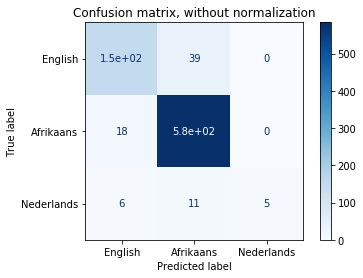

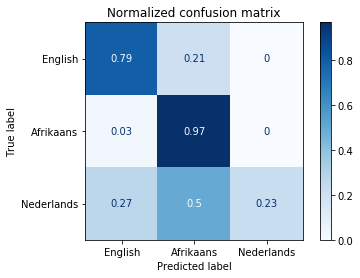

In [62]:
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ['English', 'Afrikaans', 'Nederlands']
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rfc_char8, char8_test_features, test_labels,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.grid(False)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    
plt.grid(False)
plt.show()

Confusion matrix, without normalization
[[147  21  20]
 [ 30 544  28]
 [  3   2  17]]
Normalized confusion matrix
[[0.78191489 0.11170213 0.10638298]
 [0.04983389 0.90365449 0.04651163]
 [0.13636364 0.09090909 0.77272727]]


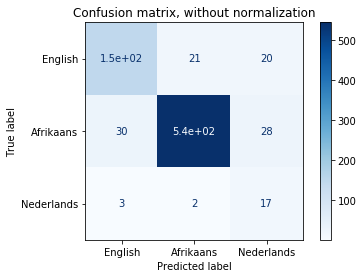

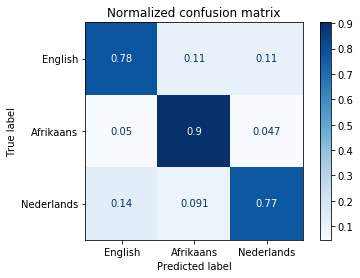

In [63]:
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ['English', 'Afrikaans', 'Nederlands']
for title, normalize in titles_options:
    disp = plot_confusion_matrix(lsvc_char8, char8_test_features, test_labels,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.grid(False)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    
plt.grid(False)
plt.show()

In [64]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, predictions_char8_lsvc, target_names=['English', 'Afrikaans', 'Nederlands']))

              precision    recall  f1-score   support

     English       0.82      0.78      0.80       188
   Afrikaans       0.96      0.90      0.93       602
  Nederlands       0.26      0.77      0.39        22

    accuracy                           0.87       812
   macro avg       0.68      0.82      0.71       812
weighted avg       0.91      0.87      0.89       812



Confusion matrix, without normalization
[[150  19  19]
 [ 35 540  27]
 [  3   2  17]]
Normalized confusion matrix
[[0.79787234 0.10106383 0.10106383]
 [0.05813953 0.89700997 0.0448505 ]
 [0.13636364 0.09090909 0.77272727]]


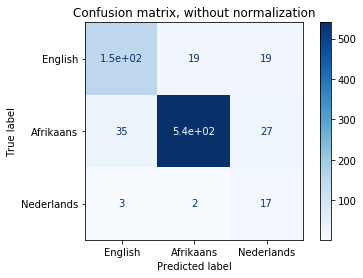

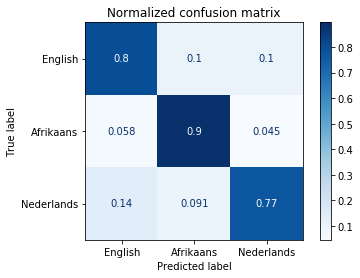

In [65]:
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ['English', 'Afrikaans', 'Nederlands']
for title, normalize in titles_options:
    disp = plot_confusion_matrix(lr_char8, char8_test_features, test_labels,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.grid(False)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    
plt.grid(False)
plt.show()

In [66]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, predictions_char8_lr, target_names=['English', 'Afrikaans', 'Nederlands']))

              precision    recall  f1-score   support

     English       0.80      0.80      0.80       188
   Afrikaans       0.96      0.90      0.93       602
  Nederlands       0.27      0.77      0.40        22

    accuracy                           0.87       812
   macro avg       0.68      0.82      0.71       812
weighted avg       0.91      0.87      0.88       812



Confusion matrix, without normalization
[[188   0   0]
 [124 475   3]
 [  5   1  16]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.20598007 0.78903654 0.00498339]
 [0.22727273 0.04545455 0.72727273]]


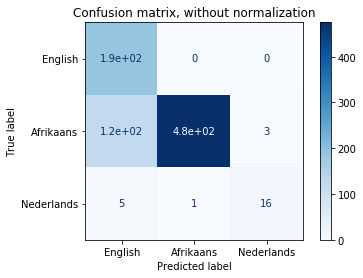

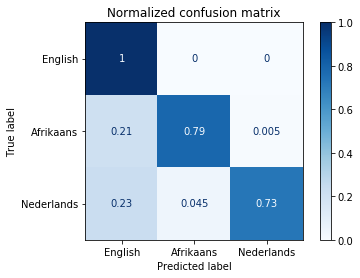

In [67]:
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ['English', 'Afrikaans', 'Nederlands']
for title, normalize in titles_options:
    disp = plot_confusion_matrix(nb_uni, uni_test_features, test_labels,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.grid(False)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    
plt.grid(False)
plt.show()

In [68]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, predictions_uni_nb, target_names=['English', 'Afrikaans', 'Nederlands']))

              precision    recall  f1-score   support

     English       0.59      1.00      0.74       188
   Afrikaans       1.00      0.79      0.88       602
  Nederlands       0.84      0.73      0.78        22

    accuracy                           0.84       812
   macro avg       0.81      0.84      0.80       812
weighted avg       0.90      0.84      0.85       812



Confusion matrix, without normalization
[[187   0   1]
 [ 39 555   8]
 [  7   0  15]]
Normalized confusion matrix
[[0.99468085 0.         0.00531915]
 [0.06478405 0.92192691 0.01328904]
 [0.31818182 0.         0.68181818]]


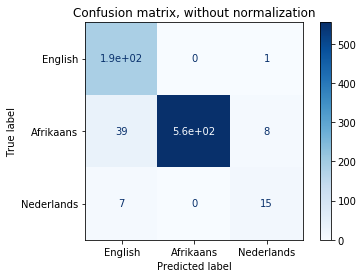

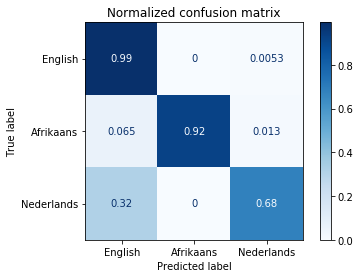

In [69]:
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ['English', 'Afrikaans', 'Nederlands']
for title, normalize in titles_options:
    disp = plot_confusion_matrix(nb_char3, char3_test_features, test_labels,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.grid(False)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    
plt.grid(False)
plt.show()

Confusion matrix, without normalization
[[156  20  12]
 [ 76 477  49]
 [  4   4  14]]
Normalized confusion matrix
[[0.82978723 0.10638298 0.06382979]
 [0.12624585 0.7923588  0.08139535]
 [0.18181818 0.18181818 0.63636364]]


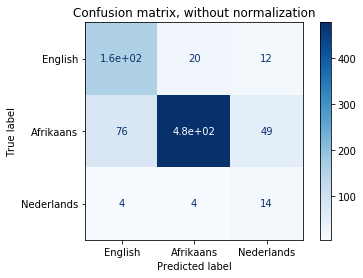

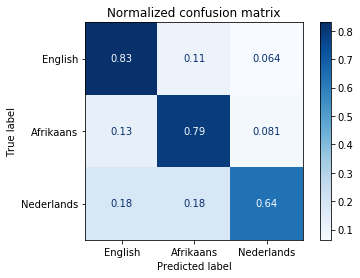

In [70]:
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ['English', 'Afrikaans', 'Nederlands']
for title, normalize in titles_options:
    disp = plot_confusion_matrix(nb_char8, char8_test_features, test_labels,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.grid(False)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    
plt.grid(False)
plt.show()

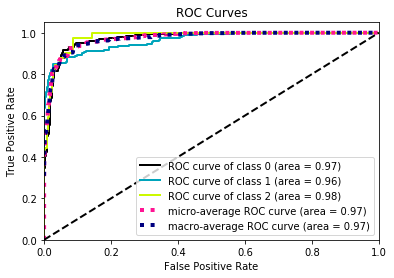

In [75]:
import scikitplot as skplt

y_prob = lr_char8.predict_proba(char8_train_features)

plot = skplt.metrics.plot_roc(train_labels, y_prob)
plt.title("ROC Curves");

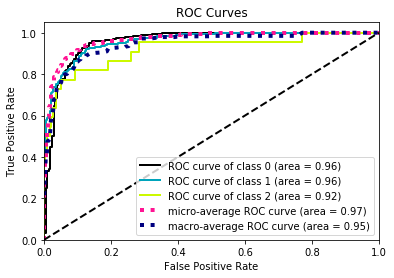

In [74]:
import scikitplot as skplt

y_prob = lr_char8.predict_proba(char8_test_features)

plot = skplt.metrics.plot_roc(test_labels, y_prob)
plt.title("ROC Curves");